# Стоимость поддержанного автомобиля [M1_21DS+]

## Цель проекта: Необходимо предсказать стоимость продажи автомобиля на вторичном рынке.


Перед нами стоит задача регрессии, значение метрики SMAPE. Целевой признак - sellingprice - цена, по которой автомобиль был продан на аукционе.

Данные
* train.csv - информация о характеристиках автомобилей (~440000), которые будут использоваться в качестве обучающих данных.
* test.csv - информация о характеристиках автомобилей (~110000), которые будут использоваться в качестве тестовых данных. Наша задача - предсказать значение 'sellingprice' для каждого автомобиля из этого датасета.
* sample_submission.csv - пример файла предсказаний в правильном формате.

Описание данных на на sample-submission:

- vin - идентификатор автомобиля в тестовом наборе.
- sellingprice - Целевой признак, числовое значение стоимости продажи.

Описание полей данных на train и test:

- vin - идентификатор автомобиля в тестовом наборе.
- Date: Год выпуска автомобиля.
- Make: Марка автомобиля.
- Model: Модель автомобиля определенной марки.
- Trim: Модификации автомобиля.
- Body: Тип кузова транспортного средства относится к форме и модели конкретной марки автомобиля.
- Transmission: Тип коробки передач.
- VIN: Идентификационный номер транспортного средства.
- State: Состояние, в котором автомобиль выставлен на аукцион.
- Condition: Состояние автомобилей на момент аукциона.
- Odometer: Пробег - расстояние, пройденное автомобилем с момента выпуска.
- Color: Цвет кузова автомобиля.
- Interior: Цвет салона автомобиля.
- Seller: Продавец автомобиля, автосалоны.
- sellingprice: цена, по которой автомобиль был продан на аукционе.
- saledate: Дата продажи автомобиля.

### План проекта:

1. Изучить и проанализировать данные. Заполнить пропуски и проанализировать целевой признак.
2. Разделить данные. Провести нормализацию данных.
3. Обучить модели и определенить лучшую модель. Проверить лучшую модель на тестовых данных.
4. Сделать отчет.

# 1. Загрузка и изучение данных

In [1]:
!pip install fuzzywuzzy -q

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.impute import KNNImputer

from sklearn.metrics import mean_absolute_error

from fuzzywuzzy import fuzz, process

from datetime import datetime
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

RANDOM_STATE = 2823

pd.set_option('display.max_colwidth', None)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
try:
    train = pd.read_csv("C:/Users/User/Documents/проекты/final_steel/train.csv")
    test = pd.read_csv("C:/Users/User/Documents/проекты/final_steel/test.csv")
    sample = pd.read_csv("C:/Users/User/Documents/проекты/final_steel/sample_submission.csv")
except:   
    train = pd.read_csv('/kaggle/input/used-cars-price-prediction-21ds/train.csv')
    test = pd.read_csv('/kaggle/input/used-cars-price-prediction-21ds/test.csv')
    sample = pd.read_csv('/kaggle/input/used-cars-price-prediction-21ds/sample_submission.csv')
    
display(train.head())

print("Размер train:", train.shape)
print("Размер test:", test.shape)
print("Размер sample:", sample.shape)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


Размер train: (440236, 15)
Размер test: (110058, 14)
Размер sample: (110058, 2)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB


In [5]:
train.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,440236.0,NaN,NaN,NaN,2010.040101,3.977945,1982.0,2007.0,2012.0,2013.0,2015.0
make,432193,92,Ford,73708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,432113,959,Altima,15454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trim,431899,1922,Base,43853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body,429843,85,Sedan,157639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,388775,2,automatic,375061,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vin,440236,440236,2fmdk3jc4bba41556,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,440236,38,fl,65618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,430831.0,NaN,NaN,NaN,3.425077,0.949973,1.0,2.7,3.6,4.2,5.0
odometer,440167.0,NaN,NaN,NaN,68344.421604,53542.203908,1.0,28258.0,52098.0,99272.0,999999.0


In [6]:
display(test.head())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)


In [7]:
test.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,110058.0,NaN,NaN,NaN,2010.060005,3.96019,1982.0,2007.0,2012.0,2013.0,2015.0
make,107997,85,Ford,18383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,107979,824,Altima,3736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trim,107944,1496,Base,11007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body,107464,77,Sedan,39255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,97047,2,automatic,93584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vin,110058,110058,1g6dp567450124779,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,110058,38,fl,16295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,107679.0,NaN,NaN,NaN,3.423222,0.951301,1.0,2.7,3.6,4.2,5.0
odometer,110039.0,NaN,NaN,NaN,68074.331601,53520.988173,1.0,28313.5,51922.0,98852.5,999999.0


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  97047 non-null   object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB


In [9]:
train['saledate'] = pd.to_datetime(train['saledate'], errors='coerce', utc=True)
test['saledate'] = pd.to_datetime(test['saledate'], errors='coerce', utc=True)
print(f"Временной период на train от {np.min(train['saledate'])} до {np.max(train['saledate'])} ")
print(f"Временной период на test от {np.min(train['saledate'])} до {np.max(train['saledate'])} ")

Временной период на train от 2014-01-01 01:15:00+00:00 до 2015-07-20 19:30:00+00:00 
Временной период на test от 2014-01-01 01:15:00+00:00 до 2015-07-20 19:30:00+00:00 


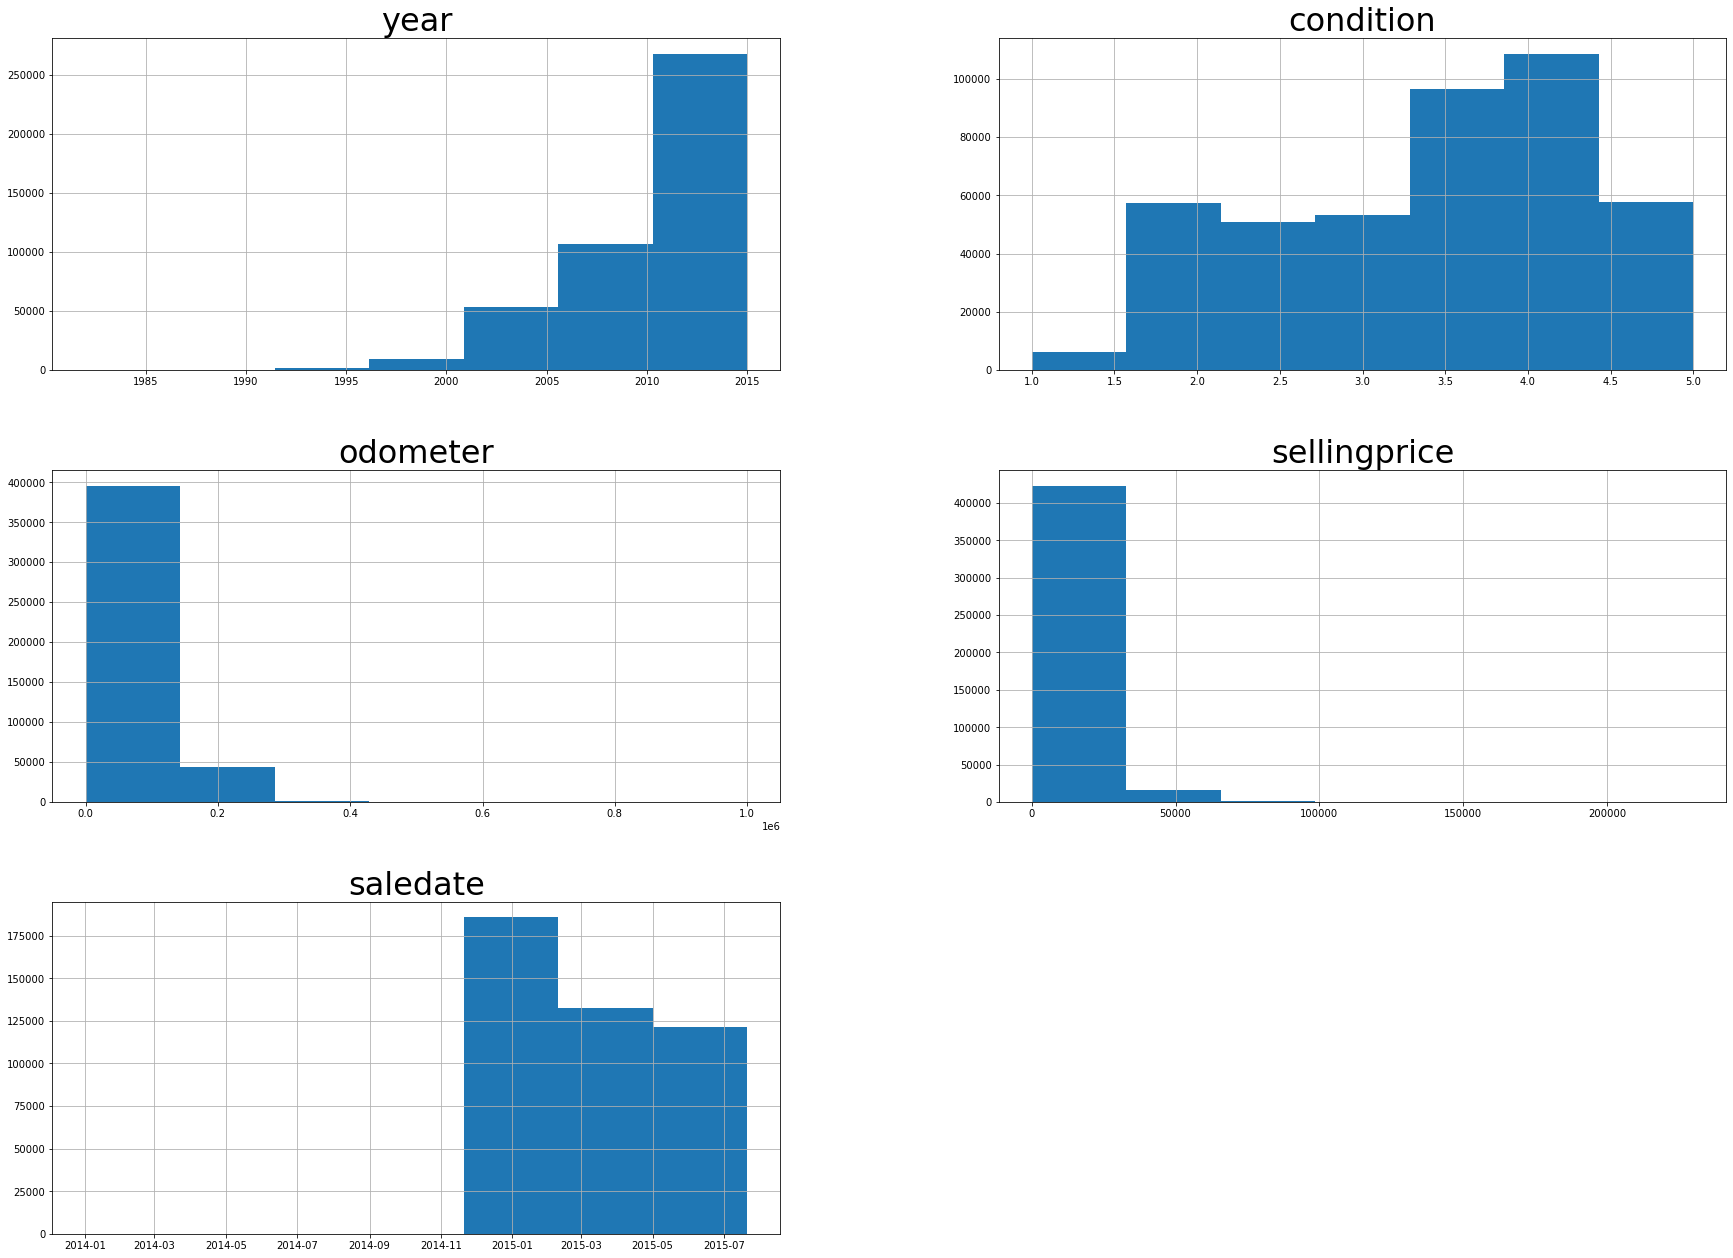

In [10]:
digital_features=train.select_dtypes(exclude=['object'])#построим гистограммы для числовых признаков
fig = digital_features.hist(figsize=(30,22), bins=7)
[x.title.set_size(32) for x in fig.ravel()]
plt.show()

Нам даны 15 признаков на обучающем датасете, в том числе целевой признак sellingprice, 440236 строк. В тестовом наборе данных дано 14 признаков, без целевого признака и 110058 строк. Большинство признаков категориальных, но есть и числовые, например как odometer. В данных есть пропуски в обоих датасетах. Период продажи автомобилей с 01.01.2014г. по 20.07.2015г. Уникальных значений в каждом столбце значительное количество. Распределение по году выпуска показывает, что в основном продажа автомобилей осуществляется более свежего года. Состояние автомобилей не равномерное. Пробег автомобилей в основном имеет к низкую отметку. Продажа автомобилей в среднем 13592.

## 2. Предобработка данных

In [11]:
#посмотрим на количество пропусков
train.isna().sum().sort_values()

year                0
vin                 0
state               0
seller              0
sellingprice        0
saledate            0
odometer           69
color             586
interior          586
make             8043
model            8123
trim             8337
condition        9405
body            10393
transmission    51461
dtype: int64

Есть небольшое количество пропусков в столбцах odometer, color, interior. В других столбцах есть подавляющее число пропусков. Transmission и body лидируют.

In [12]:
train.duplicated().sum()#проверим наличие дубликатов

0

In [13]:
test.isna().sum().sort_values()

year                0
vin                 0
state               0
seller              0
saledate            0
odometer           19
color             158
interior          158
make             2061
model            2079
trim             2114
condition        2379
body             2594
transmission    13011
dtype: int64

In [14]:
test.duplicated().sum()

0

Количество пропущенных значений по столбцам идентичны с датасетом train. Количество пропусков меньше, так как размер датасета меньше train. 

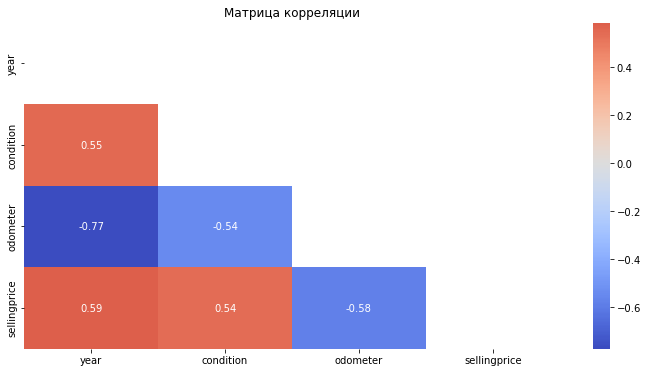

In [15]:
#посмотрим на корреляцию
plt.figure(figsize=(12, 6))
matrix = np.triu(train.corr())
sns.heatmap(train.corr(), annot=True, center= 0, cmap= 'coolwarm', mask=matrix)
plt.title('Матрица корреляции');

Средняя положительная корреляция между столбцами condition и sellingprice. Средняя отрицательная корреляция между condition и odometer.

In [16]:
#посмотрим на корреляцию пропущенных значений в столбцах
train_1 = train.iloc[:, [i for i, n in enumerate(np.var(train.isnull(), axis = 'rows')) if n > 0]]
train_1.isnull().corr()

,make,model,trim,body,transmission,condition,odometer,color,interior
make,1.000000,0.994971,0.981875,0.877313,0.023535,-0.012414,0.001002,0.001532,0.001532
model,0.994971,1.000000,0.976931,0.872853,0.023140,-0.012553,0.000980,0.003790,0.003790
trim,0.981875,0.976931,1.000000,0.893508,0.022742,-0.006351,0.003585,0.001327,0.001327
body,0.877313,0.872853,0.893508,1.000000,0.023568,0.026693,0.006419,0.002120,0.002120
transmission,0.023535,0.023140,0.022742,0.023568,1.000000,0.020664,0.010129,0.010180,0.010180
condition,-0.012414,-0.012553,-0.006351,0.026693,0.020664,1.000000,0.059642,0.027352,0.027352
odometer,0.001002,0.000980,0.003585,0.006419,0.010129,0.059642,1.000000,0.034380,0.034380
color,0.001532,0.003790,0.001327,0.002120,0.010180,0.027352,0.034380,1.000000,1.000000
interior,0.001532,0.003790,0.001327,0.002120,0.010180,0.027352,0.034380,1.000000,1.000000


Очень сильная положительная корреляция model с make, trim, сильная корреляция с body. Используем эти данные чтобы создать синтетические признаки.

__Рассмотрим столбец model__

In [17]:
train.model = train.model.astype(str).str.lower()
test.model = test.model.astype(str).str.lower()

In [18]:
print(train['model'].nunique())
train['model'].value_counts(normalize=True)[:10]

840


altima      0.035104
f-150       0.025913
fusion      0.023269
camry       0.022715
escape      0.021459
focus       0.018676
nan         0.018451
accord      0.016414
3 series    0.014551
impala      0.014322
Name: model, dtype: float64

In [19]:
print(test['model'].nunique())
test['model'].value_counts(normalize=True)[:10]

747


altima           0.033946
f-150            0.024869
fusion           0.023197
camry            0.022016
escape           0.020862
nan              0.018890
focus            0.018790
accord           0.016573
3 series         0.015101
grand caravan    0.014556
Name: model, dtype: float64

In [20]:
model_top = list(train['model'].value_counts(normalize=True)[:10].index)
test['model'].value_counts(normalize=True).filter(items=model_top)

altima      0.033946
f-150       0.024869
fusion      0.023197
camry       0.022016
escape      0.020862
focus       0.018790
nan         0.018890
accord      0.016573
3 series    0.015101
impala      0.014002
Name: model, dtype: float64

Мы видим что в обучающей выборке самые популярные модели есть с пропуском, так же как и в тестовом наборе данных. Сравнив выборки, можно сделать вывод, что в обучающем наборе не хватет модели grand caravan, а в тестовом наборе impala. Заменим пропущенные значения тех моделей, которые мы выявили в топе 10 моделей.

In [21]:
train[['model']] = train[['model']].fillna('Grand caravan')
print(train['model'].nunique())
train['model'].value_counts(normalize=True)[:10]

840


altima      0.035104
f-150       0.025913
fusion      0.023269
camry       0.022715
escape      0.021459
focus       0.018676
nan         0.018451
accord      0.016414
3 series    0.014551
impala      0.014322
Name: model, dtype: float64

In [22]:
train_dic={'nan':'grand caravan'}
test_dic={'nan':'impala'}
train['model'].replace(train_dic, inplace=True)
test['model'].replace(test_dic, inplace=True)

__Столбец vin__

In [23]:
#посмотрим есть ли дубликаты в идентификаторе автомобиля
train['vin'].is_unique #дубликатов нет

True

__Столбец trim__

In [24]:
print(train['trim'].nunique())
train['trim'].value_counts()[:5]

1922


Base       43853
SE         34465
LX         16490
Limited    14514
LT         13374
Name: trim, dtype: int64

In [25]:
print(test['trim'].nunique())
test['trim'].value_counts()[:5]

1496


Base       11007
SE          8715
LX          4094
Limited     3536
LT          3268
Name: trim, dtype: int64

Заменим пропущенные значения модификации автомобиля топовым значением

__Столбец body__

In [26]:
train.model = train.body.astype(str).str.lower()
test.model = test.body.astype(str).str.lower()

In [27]:
print(train['body'].unique())

['suv' 'Sedan' 'sedan' nan 'SUV' 'wagon' 'Minivan' 'Extended Cab'
 'Regular Cab' 'Coupe' 'SuperCrew' 'Wagon' 'convertible' 'Crew Cab'
 'SuperCab' 'Convertible' 'Hatchback' 'minivan' 'hatchback' 'G Coupe'
 'G Convertible' 'coupe' 'Access Cab' 'G Sedan' 'regular cab'
 'e-series van' 'supercrew' 'Quad Cab' 'tsx sport wagon' 'Van' 'g sedan'
 'E-Series Van' 'CTS Coupe' 'Koup' 'King Cab' 'extended cab' 'double cab'
 'Elantra Coupe' 'koup' 'access cab' 'Double Cab' 'crew cab' 'quad cab'
 'g coupe' 'CrewMax Cab' 'supercab' 'g convertible' 'Genesis Coupe' 'van'
 'G37 Coupe' 'club cab' 'Beetle Convertible' 'Mega Cab' 'regular-cab'
 'Xtracab' 'cts coupe' 'genesis coupe' 'Club Cab' 'q60 coupe' 'mega cab'
 'crewmax cab' 'Promaster Cargo Van' 'king cab' 'CTS-V Coupe'
 'TSX Sport Wagon' 'CTS Wagon' 'Cab Plus 4' 'G37 Convertible'
 'Transit Van' 'Q60 Convertible' 'elantra coupe' 'beetle convertible'
 'Q60 Coupe' 'promaster cargo van' 'Cab Plus' 'transit van'
 'g37 convertible' 'g37 coupe' 'Ram Van' 'gr

In [28]:
print(test['body'].unique())

['Sedan' 'Van' 'SUV' 'Crew Cab' 'wagon' 'G Sedan' 'Hatchback' 'sedan'
 'Convertible' 'crew cab' nan 'van' 'Minivan' 'Wagon' 'Coupe' 'suv'
 'supercrew' 'minivan' 'SuperCrew' 'quad cab' 'g coupe' 'CrewMax Cab'
 'Regular Cab' 'G37 Coupe' 'hatchback' 'Quad Cab' 'regular cab' 'coupe'
 'E-Series Van' 'Extended Cab' 'supercab' 'e-series van' 'Access Cab'
 'G Coupe' 'convertible' 'Double Cab' 'extended cab' 'SuperCab' 'king cab'
 'g sedan' 'CTS Coupe' 'genesis coupe' 'Beetle Convertible' 'access cab'
 'Promaster Cargo Van' 'crewmax cab' 'G Convertible' 'Mega Cab' 'koup'
 'Elantra Coupe' 'Koup' 'Q60 Convertible' 'g convertible' 'Q60 Coupe'
 'double cab' 'Club Cab' 'King Cab' 'CTS-V Coupe' 'Xtracab'
 'Genesis Coupe' 'tsx sport wagon' 'club cab' 'mega cab' 'cts coupe'
 'elantra coupe' 'cts-v coupe' 'granturismo convertible' 'Cab Plus'
 'TSX Sport Wagon' 'promaster cargo van' 'G37 Convertible' 'regular-cab'
 'Transit Van' 'CTS Wagon' 'transit van' 'GranTurismo Convertible'
 'q60 convertible' 'xtra

In [29]:
body_dic={'nan':None, 'incomplete - cutaway':None,
          "extended cab":"cab",'regular cab':'cab',
          'crew cab':'cab','supercab':'cab','access cab':'cab',
          'quad cab':'cab','king cab':'cab','double cab':'cab',
          'crewmax cab':'cab','club cab':'cab',
          'mega cab':'cab','regular-cab':'cab','xtracab':'cab',
          'cab plus 4':'cab','cab plus':'cab',
          'sport utility vehicle (suv)/multi-purpose vehicle (mpv)':'suv',
          'g coupe':'coupe','g sedan':'sedan','e-series van':'van',
          'minivan':'van','sedan/saloon':'sedan','cargo van':'van',
          'cts coupe':'coupe', 'elantra coupe':'coupe',
          'hatchback/liftback/notchback':'hatchback','convertible/cabriolet':'cab',
           'genesis coupe': 'coupe','incomplete':None, 'g37 coupe':'coupe',
           'q60 coupe':'coupe','promaster cargo van':'van','cts-v coupe':'coupe',
          'transit van':'van','g convertible':'convertible','g37 convertible':'convertible',
          'q60 convertible':'convertible','ram van':'van','granturismo convertible':'convertible',
          'cts-v wagon':'wagon', 'tsx sport wagon': 'wagon',
          'cts wagon':'wagon','koup':'coupe','beetle convertible':'convertible'
         }
train['body'].replace(body_dic, inplace=True)
test['body'].replace(body_dic, inplace=True)
test['body'].unique()

array(['Sedan', 'Van', 'SUV', 'Crew Cab', 'wagon', 'G Sedan', 'Hatchback',
       'sedan', 'Convertible', 'cab', nan, 'van', 'Minivan', 'Wagon',
       'Coupe', 'suv', 'supercrew', 'SuperCrew', 'coupe', 'CrewMax Cab',
       'Regular Cab', 'G37 Coupe', 'hatchback', 'Quad Cab',
       'E-Series Van', 'Extended Cab', 'Access Cab', 'G Coupe',
       'convertible', 'Double Cab', 'SuperCab', 'CTS Coupe',
       'Beetle Convertible', 'Promaster Cargo Van', 'G Convertible',
       'Mega Cab', 'Elantra Coupe', 'Koup', 'Q60 Convertible',
       'Q60 Coupe', 'Club Cab', 'King Cab', 'CTS-V Coupe', 'Xtracab',
       'Genesis Coupe', 'Cab Plus', 'TSX Sport Wagon', 'G37 Convertible',
       'Transit Van', 'CTS Wagon', 'GranTurismo Convertible'],
      dtype=object)

In [30]:
print(test['body'].nunique())
test['body'].value_counts()[:5]

50


Sedan      39255
SUV        23540
sedan       8510
suv         4755
Minivan     4250
Name: body, dtype: int64

Заменим пропущенные значения столбца body топовым значением.

__Столбец transmission__

In [31]:
print(train['transmission'].nunique())
train['transmission'].value_counts()[:2]

2


automatic    375061
manual        13714
Name: transmission, dtype: int64

In [32]:
print(test['transmission'].nunique())
test['transmission'].value_counts()[:2]

2


automatic    93584
manual        3463
Name: transmission, dtype: int64

Так как в данных нет универсальной коробки передач, можем предположить, что пропущенные данные имеют вид универсальной коробки. Заменим пропущенные значения заглушкой

In [33]:
train.transmission.fillna('univercal', inplace = True)
test.transmission.fillna('univercal', inplace = True)

__Столбец state__

In [34]:
train.state.unique()

array(['md', 'mo', 'nj', 'tx', 'mi', 'nc', 'fl', 'oh', 'ca', 'az', 'ga',
       'tn', 'in', 'pa', 'va', 'wi', 'co', 'ny', 'il', 'nv', 'mn', 'wa',
       'sc', 'la', 'ne', 'ok', 'or', 'on', 'ma', 'ab', 'pr', 'hi', 'ut',
       'qc', 'ms', 'nm', 'ns', 'al'], dtype=object)

In [35]:
test.state.unique()

array(['ca', 'pa', 'oh', 'fl', 'tn', 'nc', 'il', 'ga', 'in', 'mi', 'tx',
       'wi', 'ny', 'pr', 'sc', 'wa', 'mn', 'md', 'co', 'va', 'la', 'nv',
       'mo', 'ut', 'on', 'ma', 'qc', 'ms', 'nj', 'az', 'hi', 'or', 'ab',
       'ne', 'nm', 'ns', 'ok', 'al'], dtype=object)

__Столбец odometer__ (столбец odometer и condition пересекаются, это было выявлено в ходе заполнения пропусков)

In [36]:
train.odometer.unique()

array([111041.,  31034.,  35619., ..., 188944.,  87635., 174269.])

In [37]:
test.odometer.unique()

array([116970.,   6286.,  11831., ...,  99488.,  66085., 124036.])

Так как целью проекта было предсказание стоимости автомобиля на вторичном рынке, отсюда следует, что так или иначе новых машин без пробега здесь нет, поэтому пропущенные значения пробега мы заполним средним

In [38]:
train['odometer'] = train['odometer'].fillna(train['odometer'].mean())
test['odometer'] = test['odometer'].fillna(test['odometer'].mean())

__Столбец condition__

In [39]:
train.condition.unique()

array([4.2, 3.5, 2.2, 2.8, 2. , 2.5, 3.4, 4.8, 1.9, 1. , 3.1, 2.7, 3.6,
       2.9, 4.1, 2.6, 2.1, 3. , 4.9, 4.7, 4. , 3.3, 3.8, 3.7, 4.5, 4.6,
       5. , 4.3, 2.4, 2.3, 3.9, nan, 3.2, 4.4, 1.4, 1.5, 1.7, 1.2, 1.3,
       1.6, 1.8, 1.1])

In [40]:
train.condition.value_counts()

1.9    33207
3.5    21016
3.7    20399
4.4    20027
4.3    19712
4.2    19345
3.6    18209
4.1    18108
2.0    16431
4.0    15797
3.9    15623
2.8    15012
2.9    14823
3.8    14785
3.4    13654
2.7    12837
4.9    10305
4.8    10040
2.5     9900
4.6     9897
4.5     9660
2.6     9403
4.7     9058
5.0     8862
3.3     8459
3.0     8451
3.2     7861
2.4     7378
2.1     7260
3.1     7258
2.3     6436
1.0     5855
2.2     4742
1.8      249
1.7      198
1.6      132
1.5      123
1.4      103
1.2       74
1.1       74
1.3       68
Name: condition, dtype: int64

In [41]:
test.condition.value_counts()

1.9    8429
3.5    5233
4.4    5096
3.7    5066
4.3    4832
4.2    4631
3.6    4574
4.1    4552
2.0    4117
3.9    3995
4.0    3921
2.8    3864
2.9    3810
3.8    3669
3.4    3422
2.7    3235
4.9    2626
4.6    2557
4.8    2521
4.5    2463
2.5    2444
2.6    2290
5.0    2218
3.0    2194
4.7    2152
3.3    1976
3.2    1919
3.1    1791
2.1    1782
2.4    1780
2.3    1603
1.0    1468
2.2    1199
1.8      69
1.6      43
1.7      42
1.4      29
1.2      21
1.5      20
1.1      13
1.3      13
Name: condition, dtype: int64

Заменим пропущенные значения на 0. Возможно состояние отличное, поэтому появились пропущенные значения.

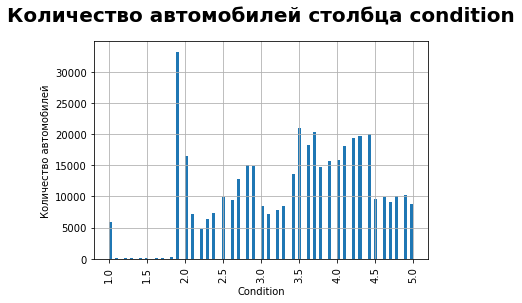

In [42]:
train.condition.hist(bins=100)
plt.xlabel("Сondition")
plt.ylabel("Количество автомобилей")
plt.title("Количество автомобилей столбца condition", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

Большинство продаж состояния 1,9, видимо это среднее состояние машин.

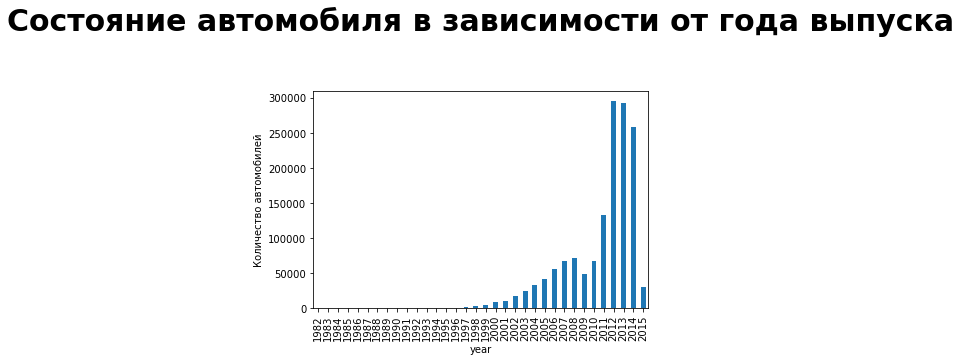

In [43]:
train['condition'].groupby(train['year']).sum().plot.bar()
plt.xlabel("year")
plt.ylabel("Количество автомобилей")
plt.title("Состояние автомобиля в зависимости от года выпуска", pad=60, fontweight="black", fontsize=30)
plt.xticks(rotation=90)
plt.show()

Среднее состояние 1,9 в основном с 2011г. по 2014г.

In [44]:
train[train['condition']==train['condition'].max()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
45,2014,Ford,wagon,Limited,Wagon,automatic,2fmgk5d85ebd31213,mo,5.0,5261.0,blue,black,ford motor credit company,26700,2015-02-09 21:30:00+00:00
63,2011,NaN,nan,NaN,NaN,automatic,1fdne1bw5bda64735,ga,5.0,67159.0,white,gray,"vpsi, inc",13200,2015-06-03 20:00:00+00:00
80,2014,Ford,suv,EL King Ranch,SUV,automatic,1fmjk1j56eef49240,mn,5.0,10103.0,—,tan,ford motor credit company,36300,2015-02-10 18:00:00+00:00
100,2012,Infiniti,g convertible,G37,G Convertible,automatic,jn1cv6fe0cm202714,ca,5.0,37284.0,blue,gray,aaero sweet company,26500,2015-01-20 20:15:00+00:00
104,2014,Chevrolet,suv,LT,SUV,automatic,1gnskbe08er171418,mi,5.0,19293.0,silver,beige,gm remarketing,41700,2015-06-03 20:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440109,2014,Chevrolet,sedan,LS,Sedan,automatic,1g11b5sl3ef228428,fl,5.0,5221.0,blue,gray,gm financial,14800,2014-12-30 04:15:00+00:00
440116,2012,Ford,sedan,SEL,Sedan,automatic,3fahp0ja0cr363253,co,5.0,21584.0,black,black,"ford motor credit company,llc pd",14800,2015-05-26 21:00:00+00:00
440152,2015,Chevrolet,suv,LS,SUV,automatic,2gnfleek4f6175951,mi,5.0,7925.0,blue,black,larry hudson chevrolet buick gmc inc,19300,2015-05-27 19:30:00+00:00
440153,2013,Chevrolet,suv,LS,SUV,automatic,1gnkvfed8dj120063,mi,5.0,23646.0,blue,gray,gm financial leasing,22000,2015-01-14 17:30:00+00:00


In [45]:
train[train['condition']==train['condition'].min()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
9,2005,Ford,wagon,Limited,wagon,automatic,1fmdk06135ga45438,oh,1.0,149364.0,black,tan,wells fargo dealer services,325,2015-06-15 22:00:00+00:00
37,2013,Chevrolet,sedan,LT,Sedan,automatic,1g11c5sa3df299624,ca,1.0,47359.0,white,black,fox rent a car tra,4000,2015-02-02 21:00:00+00:00
91,2004,Ford,supercab,XLT,SuperCab,univercal,1ftpx12584nb89868,ca,1.0,108069.0,black,gray,"jpmorgan chase bank,n.a.",2800,2014-12-16 05:00:00+00:00
166,1996,Lincoln,sedan,Executive,Sedan,automatic,1lnlm81w4ty734791,fl,1.0,154780.0,beige,tan,all star autos,800,2015-02-17 23:00:00+00:00
238,2001,Isuzu,suv,LS,SUV,automatic,4s2dm58w914313901,va,1.0,123773.0,silver,gray,automotive remarketing inc,900,2015-01-13 17:05:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439575,2000,Lincoln,sedan,V8,Sedan,automatic,1lnhm87a6yy798551,az,1.0,232343.0,red,tan,cash time title loans,650,2015-01-13 19:00:00+00:00
439621,2009,Mazda,coupe,Sport,coupe,automatic,jm1fe17p990401113,tx,1.0,90539.0,black,black,santander consumer,2100,2015-06-02 22:30:00+00:00
439922,2001,Honda,sedan,Value Package,Sedan,univercal,1hgcf86691a076674,oh,1.0,1.0,silver,gray,select remarketing group llc/loan max title,300,2014-12-30 05:00:00+00:00
440147,2009,Honda,minivan,EX,Minivan,automatic,5fnrl384x9b052581,fl,1.0,46756.0,gray,gray,regional acceptance corporation / greenville,3300,2014-12-22 01:30:00+00:00


In [46]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
col_condition = ['condition']
train[col_condition] = knn_imputer.fit_transform(train[col_condition])
test[col_condition] = knn_imputer.transform(test[col_condition])

Максимальное состояние автомобиля имеет как средний, так и высокий пробег. Поэтому мы решили обработать пропуски методом ближайших соседей.

__Столбец color__

In [47]:
train.color.unique()

array(['black', 'gold', 'silver', 'blue', 'white', 'gray', '—', 'red',
       'brown', 'green', 'beige', 'orange', nan, 'off-white', 'burgundy',
       'yellow', 'charcoal', 'purple', 'turquoise', 'lime', 'pink'],
      dtype=object)

In [48]:
test.color.unique()

array(['silver', 'white', 'gray', 'black', 'blue', 'red', 'burgundy',
       'off-white', 'gold', 'green', 'orange', 'charcoal', 'brown', '—',
       'beige', 'yellow', 'purple', nan, 'turquoise', 'pink', 'lime'],
      dtype=object)

In [49]:
color_top = list(train['color'].value_counts(normalize=True)[:10].index)
train['color'].value_counts(normalize=True).filter(items=color_top)

black     0.198146
white     0.191400
silver    0.149362
gray      0.148491
blue      0.091521
red       0.078503
—         0.044399
green     0.020414
gold      0.020321
beige     0.016506
Name: color, dtype: float64

In [50]:
color_top = list(test['color'].value_counts(normalize=True)[:10].index)
test['color'].value_counts(normalize=True).filter(items=color_top)

black     0.200237
white     0.190428
silver    0.148863
gray      0.148753
blue      0.092630
red       0.076288
—         0.045023
green     0.020655
gold      0.020082
beige     0.016615
Name: color, dtype: float64

Заменим значения цвета топовым значением

In [51]:
train['color'] = train['color'].str.replace("—", "black")
test['color'] = test['color'].str.replace("—", "black")

__Столбец seller___

In [52]:
print(train['seller'].nunique())
train['seller'].value_counts(normalize=True)[:10]

13025


nissan-infiniti lt                       0.035942
ford motor credit company,llc            0.034700
the hertz corporation                    0.033373
santander consumer                       0.027781
avis corporation                         0.022938
nissan infiniti lt                       0.018090
wells fargo dealer services              0.016039
enterprise veh exchange/rental           0.012530
tdaf remarketing                         0.012275
ge fleet services for itself/servicer    0.012193
Name: seller, dtype: float64

In [53]:
print(test['seller'].nunique())
test['seller'].value_counts(normalize=True)[:10]

7623


ford motor credit company,llc            0.035054
nissan-infiniti lt                       0.035000
the hertz corporation                    0.032637
santander consumer                       0.027649
avis corporation                         0.022079
nissan infiniti lt                       0.018090
wells fargo dealer services              0.015583
hyundai motor finance                    0.012393
enterprise veh exchange/rental           0.012130
ge fleet services for itself/servicer    0.011839
Name: seller, dtype: float64

In [54]:
seller_top = list(train['seller'].value_counts(normalize=True)[:10].index)
test['seller'].value_counts(normalize=True).filter(items=seller_top)

nissan-infiniti lt                       0.035000
ford motor credit company,llc            0.035054
the hertz corporation                    0.032637
santander consumer                       0.027649
avis corporation                         0.022079
nissan infiniti lt                       0.018090
wells fargo dealer services              0.015583
enterprise veh exchange/rental           0.012130
tdaf remarketing                         0.011712
ge fleet services for itself/servicer    0.011839
Name: seller, dtype: float64

Топ 10 отличается по продавцам в набрах данных. Здесь пропущенных значений нет, все значения уникальны. Так как столбец неинформативный в наших данных, мы удалим этот столбец.

__Стобец make__

In [55]:
train.make = train.make.astype(str).str.lower()
test.make = test.make.astype(str).str.lower()

In [56]:
train.make.unique()

array(['ford', 'nissan', 'hummer', 'lincoln', 'pontiac', 'hyundai', 'nan',
       'buick', 'chevrolet', 'honda', 'acura', 'cadillac', 'gmc', 'saab',
       'dodge', 'mercedes-benz', 'toyota', 'volkswagen', 'bmw',
       'infiniti', 'chrysler', 'kia', 'jaguar', 'subaru', 'jeep', 'lexus',
       'mercedes', 'scion', 'fiat', 'suzuki', 'mazda', 'volvo', 'audi',
       'mini', 'isuzu', 'mitsubishi', 'smart', 'porsche', 'land rover',
       'saturn', 'ram', 'oldsmobile', 'mercury', 'bentley', 'fisker',
       'maserati', 'tesla', 'landrover', 'vw', 'gmc truck', 'rolls-royce',
       'ferrari', 'plymouth', 'lamborghini', 'geo', 'ford truck',
       'aston martin', 'daewoo', 'mercedes-b', 'dodge tk', 'mazda tk',
       'dot', 'airstream'], dtype=object)

In [57]:
test.make.unique()

array(['cadillac', 'gmc', 'nissan', 'chevrolet', 'volkswagen', 'hyundai',
       'ford', 'infiniti', 'subaru', 'kia', 'bmw', 'nan', 'mitsubishi',
       'dodge', 'oldsmobile', 'volvo', 'pontiac', 'acura', 'honda',
       'toyota', 'audi', 'jeep', 'lincoln', 'chrysler', 'mercedes-benz',
       'ram', 'scion', 'mercury', 'lexus', 'saturn', 'mazda', 'porsche',
       'mini', 'smart', 'buick', 'hummer', 'jaguar', 'fiat', 'saab',
       'suzuki', 'land rover', 'landrover', 'geo', 'chev truck',
       'bentley', 'isuzu', 'aston martin', 'maserati', 'daewoo', 'vw',
       'tesla', 'mercedes', 'ferrari', 'fisker', 'rolls-royce', 'lotus',
       'plymouth', 'hyundai tk', 'ford tk'], dtype=object)

In [58]:
make_dic_train = {'name':['ford', 'nissan', 'hummer', 'lincoln', 'pontiac', 'hyundai', 'nan',
       'buick', 'chevrolet', 'honda', 'acura', 'cadillac', 'gmc', 'saab',
       'dodge', 'mercedes-benz', 'toyota', 'volkswagen', 'bmw',
       'infiniti', 'chrysler', 'kia', 'jaguar', 'subaru', 'jeep', 'lexus',
       'mercedes', 'scion', 'fiat', 'suzuki', 'mazda', 'volvo', 'audi',
       'mini', 'isuzu', 'mitsubishi', 'smart', 'porsche', 'land rover',
       'saturn', 'ram', 'oldsmobile', 'mercury', 'bentley', 'fisker',
       'maserati', 'tesla', 'landrover', 'vw', 'gmc truck', 'rolls-royce',
       'ferrari', 'plymouth', 'lamborghini', 'geo', 'ford truck',
       'aston martin', 'daewoo', 'mercedes-b', 'dodge tk', 'mazda tk',
       'dot', 'airstream']}

make_dic_test = {'name':['cadillac', 'gmc', 'nissan', 'chevrolet', 'volkswagen', 'hyundai',
       'ford', 'infiniti', 'subaru', 'kia', 'bmw', 'nan', 'mitsubishi',
       'dodge', 'oldsmobile', 'volvo', 'pontiac', 'acura', 'honda',
       'toyota', 'audi', 'jeep', 'lincoln', 'chrysler', 'mercedes-benz',
       'ram', 'scion', 'mercury', 'lexus', 'saturn', 'mazda', 'porsche',
       'mini', 'smart', 'buick', 'hummer', 'jaguar', 'fiat', 'saab',
       'suzuki', 'land rover', 'landrover', 'geo', 'chev truck',
       'bentley', 'isuzu', 'aston martin', 'maserati', 'daewoo', 'vw',
       'tesla', 'mercedes', 'ferrari', 'fisker', 'rolls-royce', 'lotus',
       'plymouth', 'hyundai tk', 'ford tk']}

In [59]:
df_make_train = pd.DataFrame(make_dic_train)
df_make_test = pd.DataFrame(make_dic_test)
  

mat1 = []
mat2 = []
p = []
  

list_train = df_make_train['name'].tolist()
list_test = df_make_test['name'].tolist()
  

threshold = 82
  

for i in list_train:
    mat1.append(process.extract(i, list_test, limit=2))
df_make_train['col'] = mat1
  

for j in df_make_train['col']:
    for k in j:
        if k[1] >= threshold:
            p.append(k[0])
    mat2.append(",".join(p))
    p = []
  
  

df_make_train['col'] = mat2
display("DataFrame after Fuzzy matching:")
print(df_make_train[:])
print(df_make_train[5:58])

'DataFrame after Fuzzy matching:'

          name                     col
0         ford            ford,ford tk
1       nissan                  nissan
2       hummer                  hummer
3      lincoln                 lincoln
4      pontiac                 pontiac
..         ...                     ...
58  mercedes-b  mercedes,mercedes-benz
59    dodge tk                   dodge
60    mazda tk                   mazda
61         dot                        
62   airstream                        

[63 rows x 2 columns]
             name                     col
5         hyundai      hyundai,hyundai tk
6             nan                     nan
7           buick                   buick
8       chevrolet               chevrolet
9           honda                   honda
10          acura                   acura
11       cadillac                cadillac
12            gmc                     gmc
13           saab                    saab
14          dodge                   dodge
15  mercedes-benz  mercedes-benz,mercedes
16   

In [60]:
#переименуем некоторые значения столбца чтобы не дублировать марки машин
def replace(a, b):
    train['make'].replace(a, b, inplace=True)

replace('mazda tk','mazda')
replace('ford tk','ford')
replace('dodge tk','dodge')
replace('mercedes-b','mercedes-benz')
replace('vw','volkswagen')
replace('mercedes','mercedes-benz')
replace('landrover','land rover')
replace('hyundai tk','hyundai')

In [61]:
def replace(a, b):
    test['make'].replace(a, b, inplace=True)

replace('mazda tk','mazda')
replace('ford tk','ford')
replace('dodge tk','dodge')
replace('mercedes-b','mercedes-benz')
replace('vw','volkswagen')
replace('mercedes','mercedes-benz')
replace('landrover','land rover')
replace('hyundai tk','hyundai')

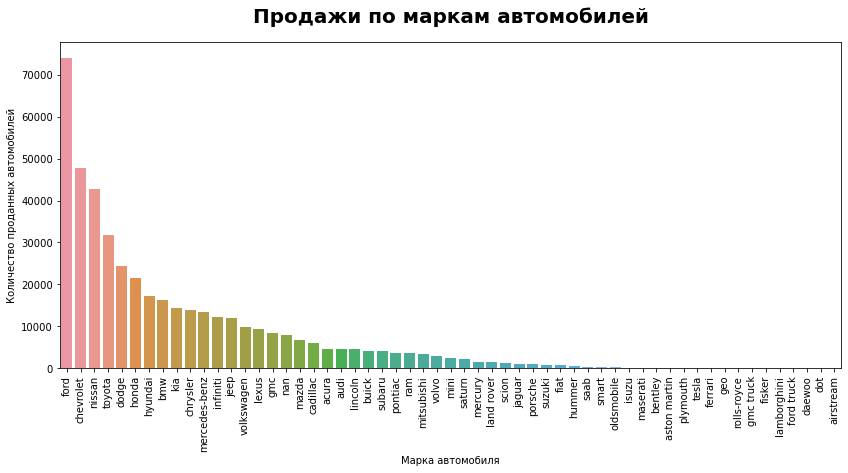

In [62]:
plt.figure(figsize=(14,6))
counts = train["make"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Марка автомобиля")
plt.ylabel("Количество проданных автомобилей")
plt.title("Продажи по маркам автомобилей", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [63]:
for idx, name in enumerate(test['make'].value_counts().index.tolist()):
    print('Name :', name)
    print('Counts :', test['make'].value_counts()[idx])

Name : ford
Counts : 18466
Name : chevrolet
Counts : 11801
Name : nissan
Counts : 10485
Name : toyota
Counts : 7728
Name : dodge
Counts : 6188
Name : honda
Counts : 5382
Name : hyundai
Counts : 4410
Name : bmw
Counts : 4136
Name : kia
Counts : 3571
Name : mercedes-benz
Counts : 3471
Name : chrysler
Counts : 3459
Name : jeep
Counts : 3069
Name : infiniti
Counts : 3002
Name : volkswagen
Counts : 2515
Name : lexus
Counts : 2430
Name : nan
Counts : 2061
Name : gmc
Counts : 2059
Name : mazda
Counts : 1676
Name : cadillac
Counts : 1496
Name : lincoln
Counts : 1153
Name : acura
Counts : 1151
Name : audi
Counts : 1124
Name : buick
Counts : 1019
Name : subaru
Counts : 1015
Name : ram
Counts : 889
Name : pontiac
Counts : 866
Name : mitsubishi
Counts : 806
Name : volvo
Counts : 765
Name : mini
Counts : 674
Name : saturn
Counts : 544
Name : mercury
Counts : 434
Name : land rover
Counts : 371
Name : scion
Counts : 318
Name : jaguar
Counts : 297
Name : porsche
Counts : 280
Name : suzuki
Counts : 222

Данные в датасетах стали похожими по топ моделям. Пропущенные значения заменим топовым значением. Самую большую часть проданных автомобилей являются марки ford, chevrolet, nissan.

In [64]:
train_make={'nan':'ford'}
test_make={'nan':'ford'}
train['make'].replace(train_make, inplace=True)
test['make'].replace(test_make, inplace=True)

__Столбец iterior__

In [65]:
train.interior.unique()

array(['black', 'beige', 'gray', 'tan', 'brown', '—', 'off-white', nan,
       'blue', 'white', 'silver', 'red', 'green', 'gold', 'purple',
       'orange', 'burgundy', 'yellow'], dtype=object)

In [66]:
test.interior.unique()

array(['black', 'gray', 'beige', 'tan', '—', 'brown', 'red', 'silver',
       nan, 'blue', 'purple', 'off-white', 'green', 'orange', 'gold',
       'burgundy', 'white', 'yellow'], dtype=object)

In [67]:
interior_top = list(train['interior'].value_counts(normalize=True)[:10].index)
train['interior'].value_counts(normalize=True).filter(items=interior_top)

black        0.437716
gray         0.320353
beige        0.106626
tan          0.078947
—            0.030850
brown        0.015508
red          0.002434
blue         0.002013
silver       0.001920
off-white    0.000848
Name: interior, dtype: float64

In [68]:
interior_top = list(test['interior'].value_counts(normalize=True)[:10].index)
test['interior'].value_counts(normalize=True).filter(items=interior_top)

black        0.438362
gray         0.318326
beige        0.108562
tan          0.078781
—            0.030755
brown        0.015141
red          0.002402
blue         0.002193
silver       0.002047
off-white    0.000974
Name: interior, dtype: float64

In [69]:
train['interior'] = train['interior'].str.replace("—", "black")
test['interior'] = test['interior'].str.replace("—", "black")

Заменим значения nan на топовое значение.

In [70]:
mode_train = train['trim'].value_counts().index[0]
train['trim'].fillna(value=mode_train, inplace=True)

mode_test = test['trim'].value_counts().index[0]
test['trim'].fillna(value=mode_test, inplace=True)

In [71]:
body_train = train['body'].value_counts().index[0]
train['body'].fillna(value=body_train, inplace=True)

body_test = test['body'].value_counts().index[0]
test['body'].fillna(value=body_test, inplace=True)

In [72]:
color_train = train['color'].value_counts().index[0]
train['color'].fillna(value=color_train, inplace=True)

color_test = test['color'].value_counts().index[0]
test['color'].fillna(value=color_test, inplace=True)

In [73]:
interior_train = train['interior'].value_counts().index[0]
train['interior'].fillna(value=interior_train, inplace=True)

interior_test = test['interior'].value_counts().index[0]
test['interior'].fillna(value=interior_test, inplace=True)

In [74]:
print(train.isnull().sum())

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
sellingprice    0
saledate        0
dtype: int64


In [75]:
print(test.isnull().sum())

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
saledate        0
dtype: int64


Все пропущенные значения обработаны.

__Целевой признак sellingprice__

Разобьем на бины цену продажи автомобиля, найдем максимум и минимум

In [76]:
train['sellingprice'].value_counts(bins=10)

(-229.0, 23000.9]       380505
(23000.9, 46000.8]       55916
(46000.8, 69000.7]        3046
(69000.7, 92000.6]         576
(92000.6, 115000.5]        116
(115000.5, 138000.4]        40
(138000.4, 161000.3]        27
(161000.3, 184000.2]         9
(207000.1, 230000.0]         1
(184000.2, 207000.1]         0
Name: sellingprice, dtype: int64

In [77]:
train[train['sellingprice']==train['sellingprice'].max()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
392004,2014,ford,suv,Titanium,SUV,automatic,1fmcu9j98eua23833,mo,4.3,27802.0,green,tan,ford-lincoln dealer program,230000,2015-02-24 18:00:00+00:00


In [78]:
train[train['sellingprice']==train['sellingprice'].min()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
137962,2003,mercedes-benz,sedan,E500,Sedan,automatic,wdbuf70j73a269529,ga,2.1,1.000000,black,black,peoples credit company inc,1,2015-01-06 01:30:00+00:00
418021,2002,ford,crew cab,XLT,Crew Cab,univercal,1ftsw31f52ed16477,ca,2.0,68344.421604,white,gray,laa leasing,1,2015-02-04 20:00:00+00:00


In [79]:
#посмотрим на дорогие автомобили
train[train['sellingprice']>161000.3]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
26083,2013,rolls-royce,sedan,Base,sedan,automatic,sca664s52dux52152,fl,4.2,7852.0,white,beige,flag/landrover southpointe,171500,2015-06-16 20:05:00+00:00
189179,2014,bmw,coupe,Base,Coupe,automatic,wby2z2c59evx64214,ca,5.0,60.0,white,brown,ferrari of orange county,165000,2015-01-14 20:00:00+00:00
195471,2012,rolls-royce,sedan,EWB,sedan,automatic,sca664l50cux65625,ca,3.6,11832.0,white,black,bentley scottsdale,169000,2015-06-17 22:30:00+00:00
218054,2012,rolls-royce,sedan,Base,sedan,automatic,sca664s59cux50803,ca,4.4,5215.0,white,tan,financial services remarketing (bmw int),167000,2015-06-17 22:30:00+00:00
291685,2012,rolls-royce,sedan,Base,Sedan,automatic,sca664s58cux50727,fl,4.5,14316.0,black,beige,braman motorcars,169500,2015-01-13 17:40:00+00:00
327282,2011,rolls-royce,sedan,Base,Sedan,automatic,sca664s58bux50113,ca,4.2,12912.0,black,black,financial services remarketing (bmw int),163000,2015-01-28 02:00:00+00:00
359111,2015,mercedes-benz,sedan,S65 AMG,Sedan,automatic,wddug7kb2fa102347,ca,4.1,5277.0,white,white,mercedes-benz usa,173000,2015-05-20 22:00:00+00:00
360913,2013,bentley,convertible,V8,Convertible,automatic,scbgt3za7dc084568,fl,4.4,2968.0,black,red,the collection,163000,2015-02-11 17:15:00+00:00
392004,2014,ford,suv,Titanium,SUV,automatic,1fmcu9j98eua23833,mo,4.3,27802.0,green,tan,ford-lincoln dealer program,230000,2015-02-24 18:00:00+00:00
423302,2011,ferrari,coupe,Base,coupe,automatic,zff67nfa1b0178698,fl,4.6,12116.0,red,black,platinum motor cars,183000,2015-06-16 20:40:00+00:00


По цене продажи мы видим аномально минимальную стоимость двух автомобилей по цене 1. Также один автомобиль с максимальной стоимостью 230000. Попробуем удалить строки с минимальной ценой из обучающей выборки, чтобы не исказить данные по прогнозированию.

In [80]:
train = train.loc[(train['sellingprice']>1)]

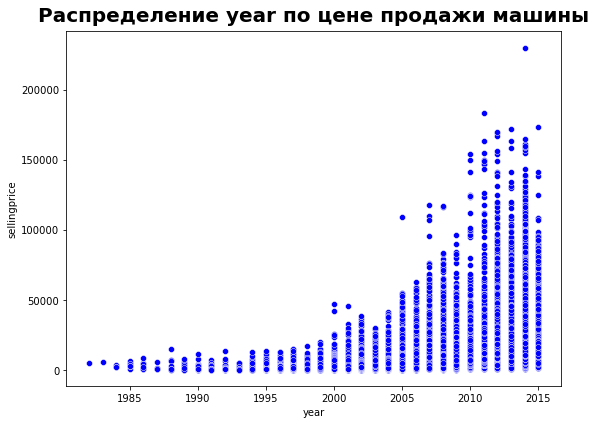

In [81]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,2,x)
        sns.scatterplot(x=col, y="sellingprice",data=train,color="blue")
        plt.title(f"Распределение {col} по цене продажи машины",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1
        
scatter_plot(["year"])

Большая часть автомобилей было продано 2005 года выпуска и выше.

C:\Users\User\AppData\Local\Temp\ipykernel_16024\4055900186.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["sellingprice"],color="blue",kde=True)


Text(0.5, 1.0, 'Стоимость проданного автомобиля')

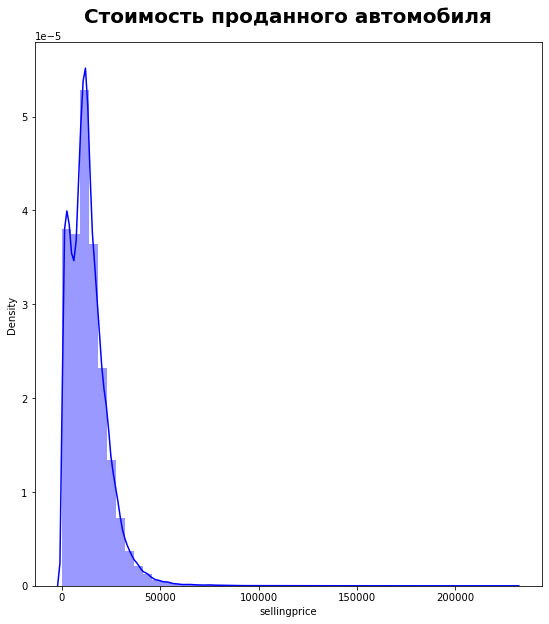

In [82]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(train["sellingprice"],color="blue",kde=True)
plt.title("Стоимость проданного автомобиля",fontweight="black",pad=20,fontsize=20)

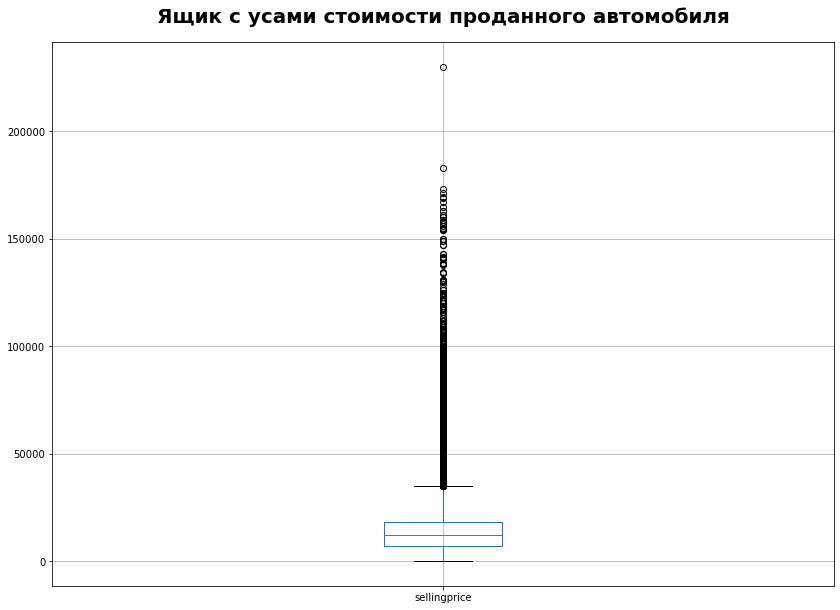

In [83]:
fig = plt.figure(figsize = (14, 10))
train.boxplot(column=['sellingprice'])
plt.title("Ящик с усами стоимости проданного автомобиля",fontweight="black",pad=20,fontsize=20);

Распределение стоимости автомобиля по графику показывает нам, что цена имеет пик в районе 22000. Цена имеет выбросы от этой стоимости. Но как мы уже увидели, это действительно дорогие марки и модели автомобилей с их техническими характеристиками.

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440234 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          440234 non-null  int64              
 1   make          440234 non-null  object             
 2   model         440234 non-null  object             
 3   trim          440234 non-null  object             
 4   body          440234 non-null  object             
 5   transmission  440234 non-null  object             
 6   vin           440234 non-null  object             
 7   state         440234 non-null  object             
 8   condition     440234 non-null  float64            
 9   odometer      440234 non-null  float64            
 10  color         440234 non-null  object             
 11  interior      440234 non-null  object             
 12  seller        440234 non-null  object             
 13  sellingprice  440234 non-null  int64        

In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          110058 non-null  int64              
 1   make          110058 non-null  object             
 2   model         110058 non-null  object             
 3   trim          110058 non-null  object             
 4   body          110058 non-null  object             
 5   transmission  110058 non-null  object             
 6   vin           110058 non-null  object             
 7   state         110058 non-null  object             
 8   condition     110058 non-null  float64            
 9   odometer      110058 non-null  float64            
 10  color         110058 non-null  object             
 11  interior      110058 non-null  object             
 12  seller        110058 non-null  object             
 13  saledate      110058 non-null  datetime64[ns

## 3. EDA

Преобразуем время продажи автомобиля и создадим новые признаки из даты.

In [86]:
train['saledate'] = pd.to_datetime(train.saledate, format='%Y-%m-%d %H:%M:%S', errors='coerce')
test['saledate'] = pd.to_datetime(test.saledate, format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [87]:
#создадим год продажи автомобиля
train['year_sale'] = train['saledate'].dt.year

#Добавим признак возраста по дате производства
train['age'] = train['year_sale'] - train['year']

#добавим сгруппированный по 5 лет признак продажи
train['age5'] = train['age']//5

In [88]:
#создадим признаки для тестовых данных
test['year_sale'] = test['saledate'].dt.year
test['age'] = test['year_sale'] - test['year']
test['age5'] = test['age']//5

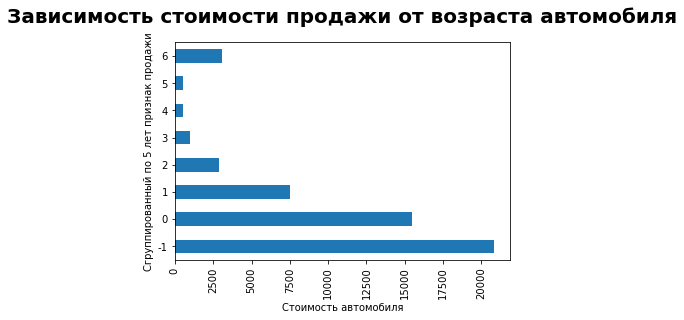

In [89]:
#Посмотрим зависимость стоимости от возраста на тренировочном датасете
train.groupby('age5').sellingprice.median().plot(kind='barh')
plt.xlabel("Стоимость автомобиля")
plt.ylabel("Сгруппированный по 5 лет признак продажи")
plt.title("Зависимость стоимости продажи от возраста автомобиля", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

Прослеживается снижение цены от границы 1 (5 лет) и до 5 (25 лет), стоимость машин на границе 6 (30 лет) выросла, т.е. это раритетные автомобили. Добавим признак раритетных автомобилей.

In [90]:
train['raritet'] = train['age5'].apply(lambda x: 1 if x>5 else 0)
test['raritet'] = test['age5'].apply(lambda x: 1 if x>5 else 0)

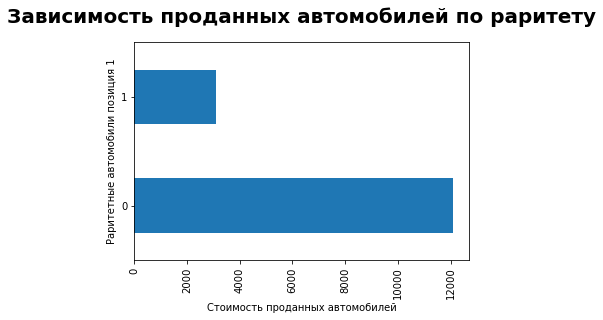

In [91]:
train.groupby('raritet').sellingprice.median().plot(kind='barh')
plt.xlabel("Стоимость проданных автомобилей")
plt.ylabel("Раритетные автомобили позиция 1")
plt.title("Зависимость проданных автомобилей по раритету", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

По графику можно понять что раритетные автомобили стоят до 3000 и их порядком меньше, чем современных.

Из даты продажи создадим признаки день, месяц, день недели, недели. Чтобы создать на их основе отклонения sin и cos по календарю продаж

In [92]:
train['day'] = train['saledate'].dt.day
train['dayofweek'] = train['saledate'].dt.dayofweek 
train['week'] = train['saledate'].dt.isocalendar().week
train['month'] = train['saledate'].dt.month

In [93]:
test['day'] = test['saledate'].dt.day
test['dayofweek'] = test['saledate'].dt.dayofweek 
test['week'] = test['saledate'].dt.isocalendar().week
test['month'] = test['saledate'].dt.month

In [94]:
train['day_sin'] = np.sin(2 * np.pi * train['day']/31)
train['day_cos'] = np.cos(2 * np.pi * train['day']/31)

train['dayofweek_sin'] = np.sin(2 * np.pi * train['dayofweek']/6)
train['dayofweek_cos'] = np.cos(2 * np.pi * train['dayofweek']/6)

train['week_sin'] = np.sin(2 * np.pi * train['week']/52)
train['week_cos'] = np.cos(2 * np.pi * train['week']/52)

train['month_sin'] = np.sin(2 * np.pi * train['month']/12)
train['month_cos'] = np.cos(2 * np.pi * train['month']/12)

#выходные 
train["is_weekend"] = train['dayofweek'].isin([5, 6]).astype(int)
train["is_sunday"] = train['dayofweek'].eq(6).astype(int)

In [95]:
test['day_sin'] = np.sin(2 * np.pi * test['day']/31)
test['day_cos'] = np.cos(2 * np.pi * test['day']/31)

test['dayofweek_sin'] = np.sin(2 * np.pi * train['dayofweek']/6)
test['dayofweek_cos'] = np.cos(2 * np.pi * train['dayofweek']/6)

test['week_sin'] = np.sin(2 * np.pi * test['week']/52)
test['week_cos'] = np.cos(2 * np.pi * test['week']/52)

test['month_sin'] = np.sin(2 * np.pi * test['month']/12)
test['month_cos'] = np.cos(2 * np.pi * test['month']/12)

#выходные 
test["is_weekend"] = test['dayofweek'].isin([5, 6]).astype(int)
test["is_sunday"] = test['dayofweek'].eq(6).astype(int)

Так же создадим новые синтетические признаки из признаков которые между собой сильно зависят, это odometer, condition. Make и trim, body. Model и trim.

In [96]:
train['condition_odometer'] = train['condition']/train['odometer']
test['condition_odometer'] = test['condition']/test['odometer']

In [97]:
train['make_trim'] = train['make']+train['trim']
test['make_trim'] = test['make']+test['trim']
train['make_body'] = train['make']+train['body']
test['make_body'] = test['make']+test['body']

In [98]:
train['model_trim'] = train['model']+train['trim']
test['model_trim'] = test['model']+test['trim']

Создадим поле для записей числовых признаков, чтобы посмотреть их корреляцию

In [99]:
#числовые признаки
num_cols = ['odometer', 'condition', 'age', 'age5', 'condition_odometer']

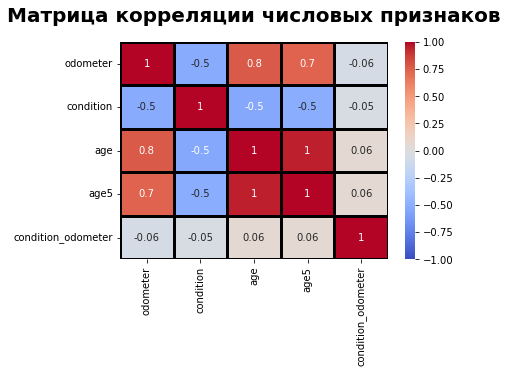

In [100]:
plt.title("Матрица корреляции числовых признаков", pad=20, fontweight="black", fontsize=20)
sns.heatmap(train[num_cols].corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, 
            cmap= 'coolwarm', linewidths=3, linecolor='black');

Возраст сильно коррелирует друг с другом, поэтому оставим признак только age

In [101]:
num_cols = ['odometer', 'condition', 'age', 'condition_odometer']

C:\Users\User\AppData\Local\Temp\ipykernel_16024\2127677762.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i].dropna(), kde = False, rug=False, bins=22)


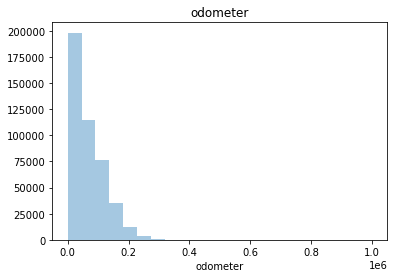

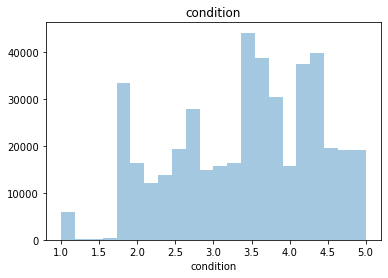

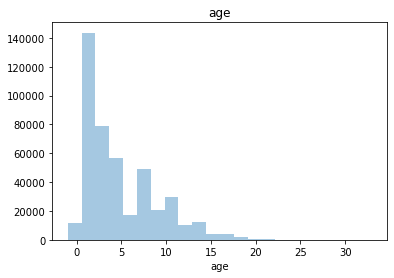

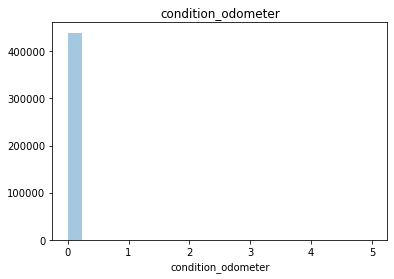

In [102]:
#Посмотрим распределение числовых признаков
for i in num_cols:
    plt.figure()
    sns.distplot(train[i].dropna(), kde = False, rug=False, bins=22)
    plt.title(i)
    plt.show()

Числовые признаки распределены более менее нормально, кроме condition и condition_odometer.

In [103]:
#посмотрим на матрицу корреляцию получившихся признаков
train_1 = train.iloc[:, [i for i, n in enumerate(np.var(train, axis = 'rows')) if n > 0]]
train_1.corr()

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,year,condition,odometer,sellingprice,year_sale,age,age5,raritet,day,dayofweek,week,month
year,1.000000,0.538998,-0.774291,0.586842,0.116474,-0.997221,-0.951721,-0.035153,-0.023312,-0.048322,-0.032745,-0.049148
condition,0.538998,1.000000,-0.528691,0.532972,0.033211,-0.539719,-0.510645,-0.008241,-0.013659,0.000472,0.003878,-0.015018
odometer,-0.774291,-0.528691,1.000000,-0.582987,-0.087971,0.772305,0.738062,0.001373,0.014776,0.027355,0.029650,0.042991
sellingprice,0.586842,0.532972,-0.582987,1.000000,0.077358,-0.584536,-0.556518,-0.005566,-0.010610,-0.001741,-0.015981,-0.031180
year_sale,0.116474,0.033211,-0.087971,0.077358,1.000000,-0.042157,-0.062633,0.001786,-0.289508,-0.147524,-0.601781,-0.824648
age,-0.997221,-0.539719,0.772305,-0.584536,-0.042157,1.000000,0.952693,0.035496,0.001735,0.037544,-0.012200,-0.012417
age5,-0.951721,-0.510645,0.738062,-0.556518,-0.062633,0.952693,1.000000,0.036600,0.007235,0.040180,0.006408,0.011194
raritet,-0.035153,-0.008241,0.001373,-0.005566,0.001786,0.035496,0.036600,1.000000,-0.000803,-0.001737,-0.001090,-0.001495
day,-0.023312,-0.013659,0.014776,-0.010610,-0.289508,0.001735,0.007235,-0.000803,1.000000,0.085009,0.080706,0.162115
dayofweek,-0.048322,0.000472,0.027355,-0.001741,-0.147524,0.037544,0.040180,-0.001737,0.085009,1.000000,0.116281,0.105279


Year_sale и month имеют сильную отрицательную корреляцию, удалим эти столбцы. Есть некоторые признаки, которые мы создали из даты продажи, которые между собой сильно коррелируют, в дальнейшем оставим только их производные, sin и cos. Так же с прошлой корреляции мы видели как interior и color сильно коррелируют между собой, поэтому мы решили удалить признак interior, так как считаем что он не будет иметь веса при обучении, на самом деле так и есть, при продаже автомобиля одно из основных в выборе принятие решения о покупке автомобиля имеет значение на цвет кузова.

In [104]:
#переведем бинарный признак в категориальный
train = train.astype({'raritet': np.object})
test = test.astype({'raritet': np.object})

C:\Users\User\AppData\Local\Temp\ipykernel_16024\139477590.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train = train.astype({'raritet': np.object})
C:\Users\User\AppData\Local\Temp\ipykernel_16024\139477590.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test = test.astype({'raritet': np.object})


## 4. Кодирование данных и деление выборки

Удалим не нужные признаки из датасетов. Поделим выборки, масштабируем, закодируем данные и будем обучать модели.

In [105]:
train.drop(columns=['saledate', 'year', 'year_sale', 'age5', 'vin', 'interior', \
                    'seller', 'day', 'dayofweek', 'week', 'month'], axis=1, inplace=True)

In [106]:
test.drop(columns=['saledate', 'year', 'year_sale', 'age5', 'vin', 'interior', \
                    'seller', 'day', 'dayofweek', 'week', 'month'], axis=1, inplace=True)

In [107]:
#выделим признаки на train
X = train.drop(columns=['sellingprice'], inplace=False)
y = train['sellingprice']

In [108]:
#разделим признаки на числовые и объекты
cat_columns = X.select_dtypes(include='object').columns.tolist()
num_columns = X.select_dtypes(include='number').columns.tolist()
cat_columns

['make',
 'model',
 'trim',
 'body',
 'transmission',
 'state',
 'color',
 'raritet',
 'make_trim',
 'make_body',
 'model_trim']

In [109]:
#закодируем и масштабируем признаки
column_transformer = make_column_transformer(
    (
        StandardScaler(),
        num_columns
    ),
    (
        OneHotEncoder(handle_unknown='ignore'),
        make_column_selector(dtype_include='object')
    ),
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [110]:
X_transformed = column_transformer.fit_transform(X)

In [111]:
column_transformer.get_feature_names_out().tolist()

['condition',
 'odometer',
 'age',
 'day_sin',
 'day_cos',
 'dayofweek_sin',
 'dayofweek_cos',
 'week_sin',
 'week_cos',
 'month_sin',
 'month_cos',
 'is_weekend',
 'is_sunday',
 'condition_odometer',
 'make_acura',
 'make_airstream',
 'make_aston martin',
 'make_audi',
 'make_bentley',
 'make_bmw',
 'make_buick',
 'make_cadillac',
 'make_chevrolet',
 'make_chrysler',
 'make_daewoo',
 'make_dodge',
 'make_dot',
 'make_ferrari',
 'make_fiat',
 'make_fisker',
 'make_ford',
 'make_ford truck',
 'make_geo',
 'make_gmc',
 'make_gmc truck',
 'make_honda',
 'make_hummer',
 'make_hyundai',
 'make_infiniti',
 'make_isuzu',
 'make_jaguar',
 'make_jeep',
 'make_kia',
 'make_lamborghini',
 'make_land rover',
 'make_lexus',
 'make_lincoln',
 'make_maserati',
 'make_mazda',
 'make_mercedes-benz',
 'make_mercury',
 'make_mini',
 'make_mitsubishi',
 'make_nissan',
 'make_oldsmobile',
 'make_plymouth',
 'make_pontiac',
 'make_porsche',
 'make_ram',
 'make_rolls-royce',
 'make_saab',
 'make_saturn',
 'm

In [112]:
# Transformer для test
X_test = column_transformer.transform(test)

In [113]:
#разделим данные
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, train_size=0.40, random_state=RANDOM_STATE)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(176093, 7794) (176093,)
(264141, 7794) (264141,)


In [114]:
#напишем метрику MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

# 5. Обучение моделей

При масштабирование получилось много признаков, поэтому мы не можем использовать для моделей GridSearchCV, ядро умирает. Проанализируем несколько моделей и выберим лучшую.

### LinearRegression

In [115]:
lr = LinearRegression().fit(X_train, y_train)
predict_test = lr.predict(X_val)
print(f"Точность модели LinearRegression по метрике MAPE: {(mape(y_val, predict_test))*100:0.2f}%")

Точность модели LinearRegression по метрике MAPE: 51.59%


### Ridge

In [116]:
model_rg = Ridge(random_state=RANDOM_STATE).fit(X_train, y_train)
predict_test_rg = model_rg.predict(X_val)
print(f"Точность модели Ridge по метрике MAPE: {(mape(y_val, predict_test_rg))*100:0.2f}%")

Точность модели Ridge по метрике MAPE: 51.88%


### DecisionTreeRegressor

In [117]:
dtr = DecisionTreeRegressor(random_state=RANDOM_STATE)
dtr.fit(X_train,y_train) 
predict_dtr_val = dtr.predict(X_val)
print(f"Точность модели DecisionTreeRegressor по метрике MAPE: {(mape(y_val, predict_dtr_val))*100:0.2f}%")

Точность модели DecisionTreeRegressor по метрике MAPE: 26.98%


### CatBoostRegressor

In [118]:
model = CatBoostRegressor(iterations = 5000,
                          random_seed = RANDOM_STATE,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
model.fit(X_train, y_train,
         eval_set=(X_val, y_val),
         verbose_eval=0,
         use_best_model=True,
         )

model.save_model('catboost.model')

In [119]:
model.get_best_score()

{'learn': {'MAE': 1642.0328865052786,
  'MAPE': 0.22093571834510328,
  'R2': 0.9335594018394068,
  'RMSE': 2519.892051500108},
 'validation': {'MAE': 1696.48126786008,
  'MAPE': 0.22393088675547235,
  'R2': 0.9250742506812083,
  'RMSE': 2664.7143431382215}}

In [120]:
predict_val = model.predict(X_val)

In [121]:
print(f"Точность модели CatBoostRegressor по метрике MAPE: {(mape(y_val, predict_val))*100:0.2f}%")

Точность модели CatBoostRegressor по метрике MAPE: 22.39%


Попробуем взять таргет в логорифм - это позволит сделать данные более нормальным распределением.

In [122]:
model.fit(X_train, np.log(y_train),
         eval_set=(X_val, np.log(y_val)),
         verbose_eval=0,
         use_best_model=True,
         )

model.save_model('catboost_log.model')

In [123]:
model.get_best_score()

{'learn': {'MAE': 0.1589394921528436,
  'MAPE': 0.018554756841004705,
  'R2': 0.9323672902426976,
  'RMSE': 0.24037033230756322},
 'validation': {'MAE': 0.1644671692324262,
  'MAPE': 0.01924916421832082,
  'R2': 0.9247474330968061,
  'RMSE': 0.25285272946681897}}

In [124]:
predict_val = np.exp(model.predict(X_val))# pазлогарифмируем предсказания модели
predict_submission = np.exp(model.predict(X_test))# submission для CatBoost с логарифмированием

In [125]:
print(f"Точность модели CatBoostRegressor c log по метрике MAPE: {(mape(y_val, predict_val))*100:0.2f}%")

Точность модели CatBoostRegressor c log по метрике MAPE: 17.70%


In [126]:
# выведим веса признаков CatBoost оказавших больше влияние на прогноз таргета
for feat, importance in zip(train.columns, model.feature_importances_):
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

feature: make, importance: 3.929137798330316
feature: model, importance: 2.433763603111332
feature: trim, importance: 26.894790205538005
feature: body, importance: 0.037961822094956986
feature: transmission, importance: 0.029428749488879677
feature: state, importance: 0.017213125963220895
feature: condition, importance: 0.16589001046585247
feature: odometer, importance: 0.21884582880271697
feature: color, importance: 0.22119009300802817
feature: sellingprice, importance: 0.07020029677755274
feature: age, importance: 0.5739424714732856
feature: raritet, importance: 0.012950322622392704
feature: day_sin, importance: 0.004901151791540126
feature: day_cos, importance: 20.974375613459156
feature: dayofweek_sin, importance: 0.38424803514379163
feature: dayofweek_cos, importance: 0.0
feature: week_sin, importance: 0.01104214228811977
feature: week_cos, importance: 0.5410854706443655
feature: month_sin, importance: 0.09706904530978049
feature: month_cos, importance: 2.4653264022911174
feature:

### Заполнение submission

In [127]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   vin           110058 non-null  object 
 1   sellingprice  110058 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.7+ MB


In [128]:
sample['sellingprice'] = predict_submission
sample.to_csv('sample_submission.csv', index=False)
sample.head(10)

,vin,sellingprice
0,1g6dp567450124779,3260.916549
1,1gtw7fca7e1902207,23080.958390
2,jn8az1mw6dw303497,17939.209600
3,2g1wf5e34d1160703,9107.054285
4,1n6aa0ec3dn301209,20034.714403
5,wvwvd63b93e175638,2196.306178
6,5npeb4ac4dh809686,11820.536053
7,1fm5k7b97dgb16454,14082.526869
8,jn1cv6ar5bm411441,17559.500944
9,3gnfc16j77g158033,8406.193027


___Вывод___

Мы изучили данные по продажам автомобилей на вторичном рынке и построили модель предсказания цены автомобиля для участия в соревновании на kaggle. Было много пропусков, каждый столбец мы анализировали и заменяли пропуски различными техниками. Выделили из некоторых признаков новые признаки, так же создали множество синтетических признаков, в том числе числовые и категориальные. Большое количество времени было затрачено на отбор финальных признаков, которые будут использоваться для обучения модели.


Сначала была использована линейная модель, показавшая на необработанных данных метрику MAPE 51,5%. Далее мы применили регуляризацию линейной модели с помощью Right, но значение метрики только ухудшилось. Затем мы обучили модель DecisionTreeRegressor, который показал метрику МАРЕ 27%. Значение все равно было довольно большим и мы решили обучить более тяжелую модель градиентного бустинга Сatboost, которая показала метрику МАРЕ 22%. Так как у нас есть много выбросов в целевом признаке, мы решили логарифмировать его, и получили метрику на этой же модели 17,7%.

Наибольшее влияние на прогнозирование стоимости автомобиля лучшего прогноза составили такие признаки как trim, day, make, model, month.

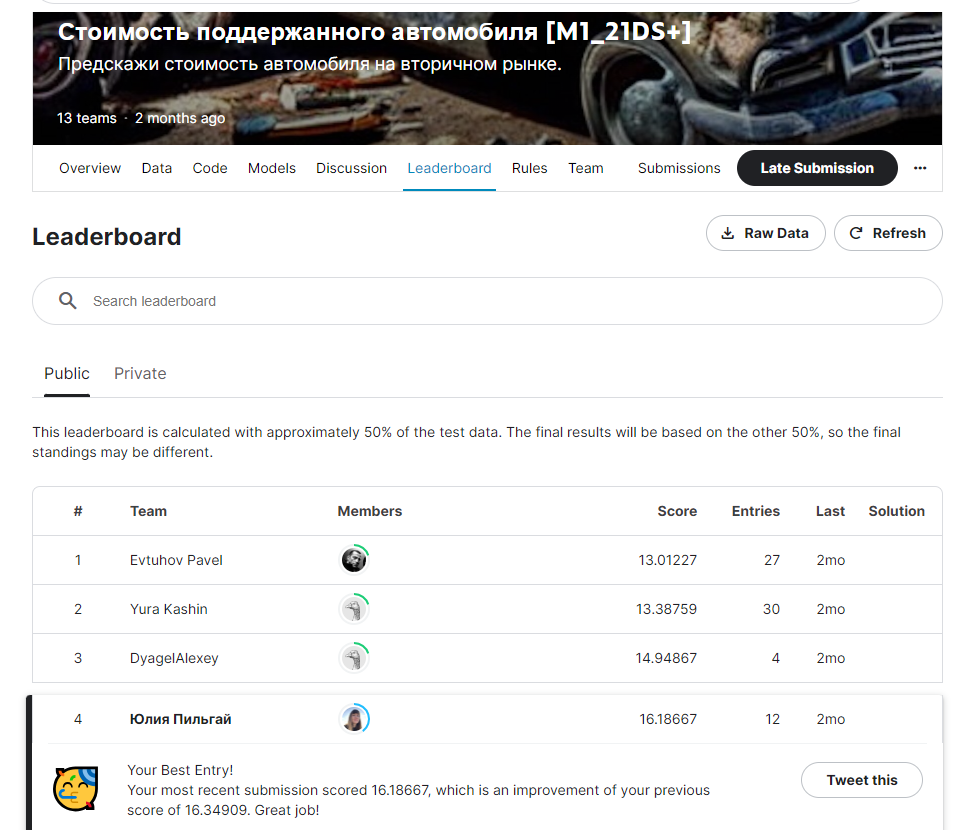